In [1]:
from river.datasets import synth
from river import evaluate
from river import metrics
from river import tree as river_tree

In [2]:
from tree_diff.tree_ruleset_conversion import *
from tree_diff.similar_tree import * 
from tree_diff.conversion import *

In [3]:
model = river_tree.ExtremelyFastDecisionTreeClassifier(
    leaf_prediction = 'mc'
)

In [4]:
gen = synth.Agrawal(classification_function=0, seed=42)

In [5]:
batch1 = iter(gen.take(10)) # small batch (to demonstrate small tree, but can also happen when low signal)

In [6]:
metric = metrics.Accuracy()

In [7]:
evaluate.progressive_val_score(batch1, model, metric)

Accuracy: 77.78%

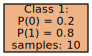

In [8]:
model.draw()

In [9]:
batch1_rules = Ruleset(river_extract_rules(model._root, river_children, river_is_leaf))

In [10]:
batch1_rules

r0:  → 1

In [11]:
batch2 = iter(gen.take(10)) # small batch (to demonstrate small tree, but can also happen when low signal)

In [12]:
evaluate.progressive_val_score(batch2, model, metric)

Accuracy: 78.95%

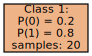

In [13]:
model.draw()

In [14]:
batch2_rules = Ruleset(river_extract_rules(model._root, river_children, river_is_leaf))

In [15]:
batch2_rules

r0:  → 1

In [16]:
rule_set_similarity(batch1_rules, batch2_rules)

Warn: caught division by zero in rule_set_similarity


nan

Bugs:
* Similarity of two trees that consist of a single root node leads to division by zero error in rule_set_similarity calculation (as temporary work-around this has been wrapped in try/except block)